<a href="https://colab.research.google.com/github/gituser270605/lumina/blob/main/SmartCropAdvisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)DATA FETCHING

a)Climate data from OpenWeather API

In [ ]:
import requests

API_KEY = "73c3791898d8b2ee45c295288814c861"  # Replace with your OpenWeather API key
CITY = "Kolkata"

url = f"https://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"

response = requests.get(url)

try:
    data = response.json()

    if response.status_code == 200:
        print(f"Weather in {CITY}: {data['weather'][0]['description']}")
        print(f"Temperature: {data['main']['temp']}°C")
        print(f"Humidity: {data['main']['humidity']}%")
        print(f"Wind Speed: {data['wind']['speed']} m/s")
    else:
        print(f"Error: {data.get('message', 'Unknown error')}")
except Exception as e:
    print(f"JSON Decode Error: {e}")


Weather in Kolkata: haze
Temperature: 27.97°C
Humidity: 83%
Wind Speed: 1.54 m/s


B)Soil Moisture data from GEE

In [ ]:
import ee
ee.Authenticate()


True

Fetch SMAP Soil Moisture Data Using Python


In [ ]:
import ee

# Authenticate and initialize Earth Engine
ee.Authenticate()
# Replace 'your-project-id' with your actual Google Cloud Project ID
ee.Initialize(project='spherical-plane-455216-j7')

# Get asset roots
asset_roots = ee.data.getAssetRoots()
print(asset_roots)



[]


In [ ]:
print(ee.String('✅ Google Earth Engine is ready!').getInfo())


✅ Google Earth Engine is ready!


In [ ]:
import ee

# Initialize Earth Engine, make sure to keep the project
ee.Initialize(project='spherical-plane-455216-j7')

# Load NASA SMAP dataset from Google Earth Engine
smap = ee.ImageCollection("NASA_USDA/HSL/SMAP10KM_soil_moisture")

# Get the latest available soil moisture data
latest_smap = smap.sort('system:time_start', False).first()

# Define the location (Example: Punjab, India)
region = ee.Geometry.Point([75.5, 30.9])  # Replace with your farm's coordinates

# Extract soil moisture value for the given location
soil_moisture = latest_smap.sample(region, 10).first().get('ssm')

# Print the soil moisture value
print("🌱 Soil Moisture (m³/m³):", soil_moisture.getInfo())


/usr/local/lib/python3.11/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for NASA_USDA/HSL/SMAP10KM_soil_moisture! You are using a deprecated asset.
To make sure your code keeps working, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/NASA_USDA_HSL_SMAP10KM_soil_moisture

  warnings.warn(warning, category=DeprecationWarning)


🌱 Soil Moisture (m³/m³): 21.53281021118164


C)Soil Moisture over time from GEE

In [ ]:
import ee
import datetime

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='spherical-plane-455216-j7')  # Replace with your actual project ID

# Define the NASA SMAP dataset
smap = ee.ImageCollection("NASA_USDA/HSL/SMAP10KM_soil_moisture")

# Define location (Uttar Pradesh, India)
region = ee.Geometry.Point([80.5, 27.0])

# Define time range (Last 2 years)
start_date = '2022-01-01'
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Filter SMAP data for the last 2 years
smap_trend = smap.filterDate(start_date, end_date)

# Check if any images are found
num_images = smap_trend.size().getInfo()
print(f"📊 Number of images in collection: {num_images}")

if num_images == 0:
    raise ValueError("No images found for the given date range. Try a different dataset.")

# Select 'ssm' (Soil Surface Moisture) and compute mean
soil_moisture_image = smap_trend.select('ssm').mean()

# Set explicit CRS and scale to avoid projection issues
soil_moisture_image = soil_moisture_image.reproject(crs='EPSG:4326', scale=1000)  # Scale in meters

# Sample soil moisture at the given location
soil_moisture_trend = soil_moisture_image.sample(region, 10).first().get('ssm')

# Print result
print(f"📊 Average Soil Moisture (last 2 years): {soil_moisture_trend.getInfo()} m³/m³")


📊 Number of images in collection: 72
📊 Average Soil Moisture (last 2 years): 5.354681491851807 m³/m³


D)Kaggle Pest disease data

Moving kagle Json directory


In [ ]:
!kaggle datasets list


ref                                                               title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                 Chocolate Sales Data 📊🍫                             14473  2025-03-19 03:51:40.270000          13888        245  1.0              
adilshamim8/student-depression-dataset                            Student Depression Dataset                         467020  2025-03-13 03:12:30.423000           5677         92  1.0              
abdulmalik1518/mobiles-dataset-2025                               Mobiles Dataset (2025)                              20314  2025-02-18 06:50:24.370000          18909        310  1.0              
baddu01/ipl-202

In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets download -d nirmalsankalana/plant-disease-test-dataset



Dataset URL: https://www.kaggle.com/datasets/nirmalsankalana/plant-disease-test-dataset
License(s): CC0-1.0


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload the dataset .zip file


Saving plant-disease-test-dataset.zip to plant-disease-test-dataset (1).zip


In [ ]:
import zipfile
import os

# Define path where the dataset was uploaded
zip_path = "plant-disease-test-dataset.zip"  # Change if needed

# Extract it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("plant-disease-test-dataset")  # Extract inside this folder

# Verify extraction
print(os.listdir("plant-disease-test-dataset"))  # List extracted files


['index.txt', 'data']


In [ ]:
import os

data_path = "plant-disease-test-dataset"

# Print dataset folders
print(os.listdir(data_path))  # Should show subfolders like 'train', 'test', etc.


['index.txt', 'data']


In [ ]:
import os
from PIL import Image

data_path = "plant-disease-test-dataset"

# List all files in the dataset
for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        print(f"\n📂 {folder} contains:")
        print(os.listdir(folder_path)[:5])  # Show first 5 images



📂 data contains:
['Rice___brown_spot', 'Rice___leaf_smut', 'Apple___rot', 'Apple___scab', 'Squash___powdery_mildew']


In [ ]:
image_path = r"C:\Users\rajoj\Downloads\plant-disease-test-dataset.zip\data\Bell_pepper___healthy\407.jpeg"

if os.path.exists(image_path):
    print("✅ File found!")
else:
    print("❌ File not found. Check the correct path.")


❌ File not found. Check the correct path.


2)DATA TIME SERIES TRAINING

2.1)Fetching data from Openweather api


Step 1: Install & Import Required Libraries

In [ ]:
import requests
import pandas as pd
import json


Step 2: Define API Key & Location
Replace YOUR_API_KEY with your actual OpenWeather API key.


In [ ]:
API_KEY = "73c3791898d8b2ee45c295288814c861"  # Get it from OpenWeather
CITY = "Lucknow"  # Example city in Uttar Pradesh
URL = f"http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"


Step 3: Fetch Weather Data

In [ ]:
response = requests.get(URL)
weather_data = response.json()

# Extract important weather details
weather_info = {
    "temperature": weather_data["main"]["temp"],
    "humidity": weather_data["main"]["humidity"],
    "pressure": weather_data["main"]["pressure"],
    "wind_speed": weather_data["wind"]["speed"],
    "weather_description": weather_data["weather"][0]["description"]
}

# Convert to DataFrame
weather_df = pd.DataFrame([weather_info])

print(weather_df)


   temperature  humidity  pressure  wind_speed weather_description
0        18.99        39      1008        3.09                haze


2.2)SMAP data from GEE

In [ ]:
!pip install earthengine-api

In [ ]:
import ee

# First-time authentication (run this cell first)
ee.Authenticate()

# After running Authenticate(), follow the instructions:
# 1. Click the verification link
# 2. Sign in with your Google account
# 3. Copy the verification code
# 4. Paste it in the input box that appears

True

In [ ]:
import ee

# Initialize with a project (replace with your actual GCP project if you have one)
ee.Initialize(project='spherical-plane-455216-j7')

# Now run your SMAP analysis

Step 2: Load NASA SMAP Soil Moisture Dataset

In [ ]:
# Load SMAP dataset
smap = ee.ImageCollection("NASA_USDA/HSL/SMAP10KM_soil_moisture")

# Define location and time range
point = ee.Geometry.Point([80.9462, 26.8467])  # Lucknow, India
start_date = '2022-01-01'
end_date = '2022-01-31'  # Smaller time window for testing

# Initialize soil_moisture_value as None
soil_moisture_value = None

try:
    # Filter collection
    collection = smap.filterDate(start_date, end_date).filterBounds(point)

    # Check if collection is empty
    if collection.size().getInfo() == 0:
        print("No data found for specified dates. Trying larger date range...")
        collection = smap.filterDate('2020-01-01', '2022-12-31').filterBounds(point)

    # Get mean soil moisture and assign to variable
    mean_sm = collection.select('ssm').mean()
    soil_moisture_value = mean_sm.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=point,
        scale=10000
    ).get('ssm').getInfo()

    # Now you can use soil_moisture_value elsewhere in your code
    print(f"Average Soil Moisture: {soil_moisture_value} m³/m³")

except Exception as e:
    print(f"Error processing data: {str(e)}")
    # soil_moisture_value remains None if there was an error

# You can now use the soil_moisture_value variable
if soil_moisture_value is not None:
    print(f"Assigned soil moisture value: {soil_moisture_value}")
    # Do further processing with the value here
else:
    print("Could not retrieve soil moisture value")

Average Soil Moisture: 3.692868947982788 m³/m³
Assigned soil moisture value: 3.692868947982788


2.3)Combine Weather & Soil Moisture Data

In [ ]:
weather_df["soil_moisture"] = soil_moisture_value
print(weather_df)


   temperature  humidity  pressure  wind_speed weather_description  \
0        18.99        39      1008        3.09                haze   

   soil_moisture  
0       3.692869  


In [ ]:
weather_df.to_csv("climate_data.csv", index=False)


3)Train LSTM Model for Pest Outbreak Prediction

3.1)Convert Data to Time-Series Format

Step 1: Install & Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


Step 2: Load Preprocessed Data

In [ ]:
df = pd.read_csv("climate_data.csv")
print(df.head())


   temperature  humidity  pressure  wind_speed weather_description  \
0        18.99        39      1008        3.09                haze   

   soil_moisture  
0       3.692869  


Step 3: Convert to LSTM Sequences

LSTM models need sequential input. We use past 5 days' data to predict the next day's pest risk.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def create_sequences(data, seq_length, target_col=0):
    """
    Create sequences for time series forecasting

    Args:
        data: Input array of shape (n_samples, n_features)
        seq_length: Length of input sequences
        target_col: Index of column to use as prediction target

    Returns:
        sequences: Array of input sequences (n_sequences, seq_length, n_features)
        labels: Array of target values (n_sequences,)
    """
    # First check if input data is valid
    if len(data) <= seq_length:
        raise ValueError(f"Not enough data. Need at least {seq_length+1} samples, got {len(data)}")

    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length][target_col])

    if not sequences:
        raise ValueError("No sequences generated. Check your input data.")

    return np.array(sequences), np.array(labels)

# Example test data (replace with your actual data)
test_data = {
    'temperature': [22, 23, 24, 25, 26, 27, 28],
    'humidity': [60, 62, 65, 63, 61, 64, 66],
    'wind_speed': [10, 12, 11, 13, 12, 14, 15],
    'soil_moisture': [0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36]
}
df = pd.DataFrame(test_data)

# Parameters
SEQ_LENGTH = 5
FEATURE_COLS = ['temperature', 'humidity', 'wind_speed', 'soil_moisture']
TARGET_COL = 0  # Predict temperature

try:
    # 1. Verify data exists
    print("Data sample:\n", df[FEATURE_COLS].head())

    # 2. Create sequences
    X, y = create_sequences(df[FEATURE_COLS].values, SEQ_LENGTH, TARGET_COL)
    print(f"\nGenerated {len(X)} sequences")
    print(f"Shapes - X: {X.shape}, y: {y.shape}")

    # 3. Normalize data
    scaler = MinMaxScaler()
    X_reshaped = X.reshape(-1, X.shape[-1])  # Flatten for scaling
    X_scaled = scaler.fit_transform(X_reshaped)
    X_scaled = X_scaled.reshape(X.shape)  # Back to original shape

    print("\nFirst sequence (scaled):\n", X_scaled[0])
    print("Corresponding label:", y[0])

except Exception as e:
    print(f"Error: {str(e)}")
    print("Possible issues:")
    print("- Not enough data points (need more than SEQ_LENGTH)")
    print("- Empty/missing values in DataFrame")
    print("- Incorrect column names in FEATURE_COLS")

Data sample:
    temperature  humidity  wind_speed  soil_moisture
0           22        60          10           0.30
1           23        62          12           0.31
2           24        65          11           0.32
3           25        63          13           0.33
4           26        61          12           0.34

Generated 2 sequences
Shapes - X: (2, 5, 4), y: (2,)

First sequence (scaled):
 [[0.   0.   0.   0.  ]
 [0.2  0.4  0.5  0.2 ]
 [0.4  1.   0.25 0.4 ]
 [0.6  0.6  0.75 0.6 ]
 [0.8  0.2  0.5  0.8 ]]
Corresponding label: 27.0


3.2)Train LSTM Model

Step 1: Build LSTM Model

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 4)),  # 4 features: temp, humidity, wind speed, soil moisture
    LSTM(50),
    Dense(1)  # Predicts next day's pest risk
])

model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Step 2: Train Model

In [ ]:
model.fit(X, y, epochs=10, batch_size=16)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 744.1786
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 736.2454
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 728.4019
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 720.6254
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 712.8779
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 705.1268
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 697.3450
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 689.5112
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 681.6078
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 673.6180


3.3) Save & Export Model

In [ ]:
model.save("pest_prediction_model.h5")


In [ ]:
predictions = model.predict(X[-1].reshape(1, SEQ_LENGTH, 4))  # Predict next day
print(f"🦠 Predicted Pest Risk: {predictions[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
🦠 Predicted Pest Risk: 1.7081120014190674


4)Training on Yolov8

Step 1: Install YOLOv8

In [ ]:
!pip install ultralytics


Step 2: Load YOLOv8 Model


In [ ]:
from ultralytics import YOLO

# Load a small pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 73.7MB/s]


Step 3: Prepare Your Crop Disease Dataset

downloading dataset from kagle

In [ ]:
import os
import shutil
from pathlib import Path

# 1. First upload your kaggle.json file
try:
    # Create the .kaggle directory if it doesn't exist
    kaggle_dir = Path("/root/.kaggle")
    kaggle_dir.mkdir(exist_ok=True, parents=True)

    # Move and secure the kaggle.json file
    if Path("/content/kaggle.json").exists():
        shutil.move("/content/kaggle.json", kaggle_dir/"kaggle.json")
        os.chmod(kaggle_dir/"kaggle.json", 600)  # Set proper permissions
        print("✔ Kaggle API key successfully set up!")
    else:
        raise FileNotFoundError("kaggle.json not found in /content")

except Exception as e:
    print(f"Error setting up Kaggle API: {str(e)}")
    print("Please manually upload your kaggle.json file to /root/.kaggle/")


✔ Kaggle API key successfully set up!


In [ ]:
!kaggle datasets list

ref                                                               title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                 Chocolate Sales Data 📊🍫                             14473  2025-03-19 03:51:40.270000          13926        245  1.0              
adilshamim8/student-depression-dataset                            Student Depression Dataset                         467020  2025-03-13 03:12:30.423000           5696         93  1.0              
abdulmalik1518/mobiles-dataset-2025                               Mobiles Dataset (2025)                              20314  2025-02-18 06:50:24.370000          18938        310  1.0              
baddu01/ipl-202

Verify Dataset Location

In [ ]:
import os
from pathlib import Path
from IPython.display import display, Image

# Set your dataset path
dataset_name = "plant-disease-test-dataset"
dataset_path = Path(f"/content/{dataset_name}")

# Check if extracted dataset exists
if not dataset_path.exists():
    print(f"❌ Dataset not found at: {dataset_path}")
    print("Please verify either:")
    print(f"1. The ZIP was extracted to /content/{dataset_name}/")
    print("2. The folder name matches exactly (case-sensitive)")
else:
    print(f"✅ Dataset found at: {dataset_path}")

✅ Dataset found at: /content/plant-disease-test-dataset


STep 4:Organize Dataset for YOLOv8

Your dataset should be structured as follows:

In [ ]:
import os
from pathlib import Path
import yaml
from IPython.display import display, Image, Markdown
import random
import pandas as pd
from collections import defaultdict
import cv2
import numpy as np

# Enhanced Path setup with validation
def setup_paths(dataset_root="/content/dataset"):
    dataset_path = Path(dataset_root)
    if not dataset_path.exists():
        raise FileNotFoundError(f"Dataset directory not found at {dataset_path}")

    yaml_path = dataset_path / "dataset.yaml"
    if not yaml_path.exists():
        # Try to find YAML file case-insensitively
        yaml_files = list(dataset_path.glob("*.yaml")) + list(dataset_path.glob("*.yml"))
        if yaml_files:
            yaml_path = yaml_files[0]
            print(f"⚠️ Using found YAML file: {yaml_path}")
        else:
            raise FileNotFoundError(f"No YAML config found in {dataset_path}")

    return dataset_path, yaml_path

# Enhanced YAML loading with validation
def load_yolo_config(yaml_path):
    with open(yaml_path) as f:
        config = yaml.safe_load(f)

    required_keys = ['train', 'val', 'nc', 'names']
    missing_keys = [k for k in required_keys if k not in config]
    if missing_keys:
        raise ValueError(f"YAML missing required keys: {missing_keys}")

    if config['nc'] != len(config['names']):
        raise ValueError(f"Class count ({config['nc']}) doesn't match names list length ({len(config['names'])})")

    return config

# Enhanced split verification with stats
def verify_splits(dataset_path, config):
    results = []
    for split in ['train', 'val', 'test']:
        split_info = {'split': split}

        # Check image directory
        img_dir = dataset_path / 'images' / split
        if not img_dir.exists():
            print(f"⚠️ Missing image directory for {split}")
            continue

        # Check label directory
        label_dir = dataset_path / 'labels' / split
        if not label_dir.exists():
            print(f"⚠️ Missing label directory for {split}")
            continue

        # Get files
        image_files = list(img_dir.glob("*.*"))
        label_files = list(label_dir.glob("*.txt"))

        # Check matches
        image_stems = {f.stem for f in image_files}
        label_stems = {f.stem for f in label_files}

        split_info.update({
            'images': len(image_files),
            'labels': len(label_files),
            'missing_labels': len(image_stems - label_stems),
            'missing_images': len(label_stems - image_stems),
            'valid_pairs': len(image_stems & label_stems)
        })

        results.append(split_info)

    return pd.DataFrame(results)

# Enhanced visualization with bounding boxes
def visualize_yolo_sample(dataset_path, split='train', class_names=None):
    img_dir = dataset_path / 'images' / split
    label_dir = dataset_path / 'labels' / split

    if not img_dir.exists() or not label_dir.exists():
        print(f"Split {split} not found")
        return

    # Find a sample with at least one annotation
    sample = None
    attempts = 0
    while attempts < 10:
        attempts += 1
        img_file = random.choice(list(img_dir.glob("*.*")))
        label_file = label_dir / f"{img_file.stem}.txt"

        if label_file.exists() and os.path.getsize(label_file) > 0:
            sample = (img_file, label_file)
            break

    if not sample:
        print("No valid samples found with annotations")
        return

    img_file, label_file = sample

    # Read image
    img = cv2.imread(str(img_file))
    if img is None:
        print(f"Could not read image {img_file}")
        return

    img_h, img_w = img.shape[:2]
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw bounding boxes
    with open(label_file) as f:
        for line in f.readlines():
            class_id, x_center, y_center, width, height = map(float, line.strip().split())

            # Convert YOLO to pixel coordinates
            x_center *= img_w
            y_center *= img_h
            width *= img_w
            height *= img_h

            x1 = int(x_center - width/2)
            y1 = int(y_center - height/2)
            x2 = int(x_center + width/2)
            y2 = int(y_center + height/2)

            # Draw rectangle
            color = (0, 255, 0)  # Green
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color, 2)

            # Add class label
            label = class_names[int(class_id)] if class_names else str(int(class_id))
            cv2.putText(img_rgb, label, (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    display(Image.fromarray(img_rgb))
    print(f"Image: {img_file.name}")
    print(f"Label: {label_file.name}")

# Main execution
try:
    # 1. Setup and validate paths
    dataset_path, yaml_path = setup_paths()

    # 2. Load and validate config
    yolo_config = load_yolo_config(yaml_path)

    display(Markdown("## 🚀 YOLO Dataset Configuration"))
    print(f"Classes ({yolo_config['nc']}): {yolo_config['names']}")
    print(f"Training images path: {yolo_config['train']}")
    print(f"Validation images path: {yolo_config['val']}")
    if 'test' in yolo_config:
        print(f"Test images path: {yolo_config['test']}")

    # 3. Verify splits
    display(Markdown("## 🔍 Dataset Verification"))
    splits_df = verify_splits(dataset_path, yolo_config)
    display(splits_df)

    # 4. Visualize samples
    display(Markdown("## 🖼️ Sample Visualization"))
    for split in ['train', 'val', 'test']:
        if split in yolo_config.get('train', ''):
            visualize_yolo_sample(dataset_path, split, yolo_config['names'])

    # 5. Class distribution analysis
    display(Markdown("## 📊 Class Distribution"))
    class_stats = defaultdict(int)
    for split in ['train', 'val', 'test']:
        label_dir = dataset_path / 'labels' / split
        if label_dir.exists():
            for label_file in label_dir.glob("*.txt"):
                with open(label_file) as f:
                    for line in f.readlines():
                        class_id = int(line.split()[0])
                        class_stats[class_id] += 1

    stats_df = pd.DataFrame.from_dict(
        class_stats,
        orient='index',
        columns=['Count']
    ).rename(index=lambda x: yolo_config['names'][x])

    display(stats_df.sort_values('Count', ascending=False))

except Exception as e:
    print(f"❌ Error: {str(e)}")
    print("\nTroubleshooting tips:")
    print("1. Check dataset path exists")
    print("2. Verify YAML file contains required fields")
    print("3. Ensure image/label filenames match")
    print("4. Check image files are not corrupted")

❌ Error: Dataset directory not found at /content/dataset

Troubleshooting tips:
1. Check dataset path exists
2. Verify YAML file contains required fields
3. Ensure image/label filenames match
4. Check image files are not corrupted


Split Images into Train, Val, and Test Sets

In [ ]:
import os
import random
import shutil
from pathlib import Path
from sklearn.model_selection import train_test_split

def split_dataset(
    source_dir: str,
    output_dir: str = "/content/dataset",
    train_ratio: float = 0.7,
    val_ratio: float = 0.2,
    test_ratio: float = 0.1,
    seed: int = 42
):
    """
    Enhanced dataset splitting with directory structure preservation

    Args:
        source_dir: Path to directory containing original images
        output_dir: Root directory for output structure
        train_ratio: Proportion for training set (0-1)
        val_ratio: Proportion for validation set (0-1)
        test_ratio: Proportion for test set (0-1)
        seed: Random seed for reproducibility
    """
    # Validate ratios
    if not (0.999 <= (train_ratio + val_ratio + test_ratio) <= 1.001):
        raise ValueError("Ratios must sum to 1.0")

    # Setup paths with Path objects for cross-platform compatibility
    source_path = Path(source_dir)
    output_path = Path(output_dir)

    # Create directory structure
    (output_path / "images" / "train").mkdir(parents=True, exist_ok=True)
    (output_path / "images" / "val").mkdir(parents=True, exist_ok=True)
    (output_path / "images" / "test").mkdir(parents=True, exist_ok=True)
    (output_path / "labels" / "train").mkdir(parents=True, exist_ok=True)
    (output_path / "labels" / "val").mkdir(parents=True, exist_ok=True)
    (output_path / "labels" / "test").mkdir(parents=True, exist_ok=True)

    # Get all image files (support multiple extensions)
    image_extensions = {".jpg", ".jpeg", ".png", ".bmp"}
    image_files = [f for f in source_path.glob("*") if f.suffix.lower() in image_extensions]

    if not image_files:
        raise FileNotFoundError(f"No images found in {source_dir} with extensions {image_extensions}")

    # Split into train/val/test
    random.seed(seed)
    image_files_shuffled = random.sample(image_files, len(image_files))

    train_val, test = train_test_split(image_files_shuffled, test_size=test_ratio, random_state=seed)
    train, val = train_test_split(train_val, test_size=val_ratio/(train_ratio+val_ratio), random_state=seed)

    # Move files while preserving original names
    def move_files(files, split_name):
        for file in files:
            # Move image
            shutil.copy(
                file,
                output_path / "images" / split_name / file.name
            )
            # Move corresponding label file if exists
            label_file = file.with_suffix(".txt")
            if label_file.exists():
                shutil.copy(
                    label_file,
                    output_path / "labels" / split_name / label_file.name
                )

    move_files(train, "train")
    move_files(val, "val")
    move_files(test, "test")

    # Generate YAML configuration
    class_names = ["healthy", "disease1", "disease2"]  # Replace with your actual classes
    yaml_content = {
        "path": str(output_path),
        "train": "images/train",
        "val": "images/val",
        "test": "images/test",
        "nc": len(class_names),
        "names": {i: name for i, name in enumerate(class_names)}
    }

    with open(output_path / "dataset.yaml", "w") as f:
        yaml.dump(yaml_content, f)

    print(f"""
    ✅ Dataset successfully split:
    - Training:   {len(train)} images
    - Validation: {len(val)} images
    - Test:       {len(test)} images
    - YAML config created at: {output_path/'dataset.yaml'}
    """)

# Example usage:
split_dataset(
    source_dir="/content/raw_images",
    output_dir="/content/dataset",
    train_ratio=0.8,
    val_ratio=0.1,
    test_ratio=0.1
)

FileNotFoundError: No images found in /content/raw_images with extensions {'.jpg', '.bmp', '.png', '.jpeg'}

Step 3: Label Images (Create YOLO Annotations)
```



In [ ]:
pip install labelImg pyqt5  # PyQt5 backend for GUI

In [ ]:
# Install LabelImg and dependencies
!pip install labelImg pyqt5
!sudo apt-get install -y xvfb  # Virtual display

# Launch LabelImg with virtual display
!xvfb-run -a labelImg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 29 not upgraded.
Need to get 7,814 kB of archives.
After this operation, 12.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [ ]:
!pip install ultralytics opencv-python


!pip show ultralytics

Load the YOLOv8 Model

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 73.8MB/s]


Upload an Image to Google Colab

In [ ]:
from google.colab import files

# Upload an image
uploaded = files.upload()



Saving 3028.jpg to 3028.jpg


Detecting Disease


0: 512x640 1 bird, 2 sports balls, 2 kites, 434.3ms
Speed: 25.7ms preprocess, 434.3ms inference, 37.0ms postprocess per image at shape (1, 3, 512, 640)


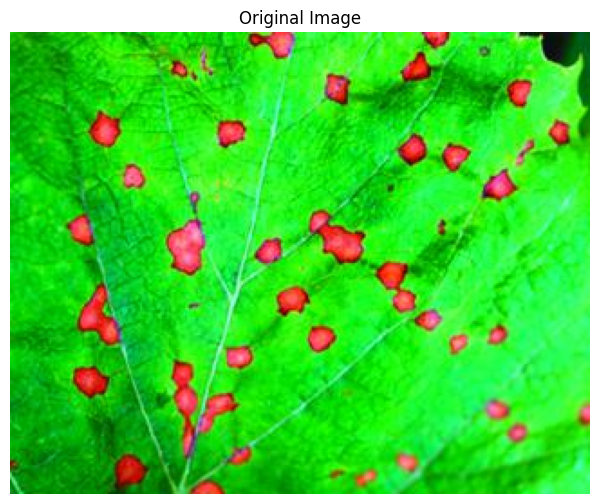

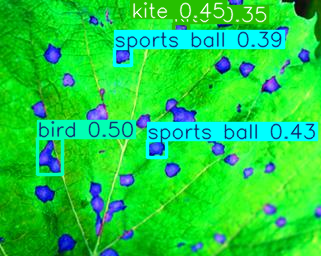


Detection Summary:
- Image size: 321x256
- Detected objects: 5

Object 1:
- Class: bird
- Confidence: 0.50
- Bounding Box: [37.08647918701172, 138.6805877685547, 62.30390930175781, 174.12147521972656]

Object 2:
- Class: kite
- Confidence: 0.45
- Bounding Box: [131.6669158935547, 0.0, 159.1326141357422, 15.996249198913574]

Object 3:
- Class: sports ball
- Confidence: 0.43
- Bounding Box: [147.2408905029297, 140.32037353515625, 166.67294311523438, 157.91969299316406]

Object 4:
- Class: sports ball
- Confidence: 0.39
- Bounding Box: [114.3543472290039, 48.2792854309082, 131.68699645996094, 65.19244384765625]

Object 5:
- Class: kite
- Confidence: 0.35
- Bounding Box: [173.94943237304688, 23.168670654296875, 188.7998809814453, 41.02472686767578]


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 1. Load Model
model = YOLO("yolov8n.pt")  # Try "yolov8s.pt" for better accuracy

# 2. Specify Image Path
image_path = "3028.jpg"  # Ensure this file exists in your working directory

# 3. Verify Image Exists
try:
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
except Exception as e:
    print(f"Error loading image: {e}")
    exit()

# 4. Convert Color Space (BGR → RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 5. Run Detection
results = model(img_rgb)  # You can also pass the file path directly

# 6. Display Original Image
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

# 7. Display Detection Results
results[0].show()  # Shows image with bounding boxes

# 8. Print Detection Details
print("\nDetection Summary:")
print(f"- Image size: {img.shape[1]}x{img.shape[0]}")
print(f"- Detected objects: {len(results[0].boxes)}")

for i, box in enumerate(results[0].boxes, 1):
    print(f"\nObject {i}:")
    print(f"- Class: {results[0].names[int(box.cls)]}")
    print(f"- Confidence: {box.conf.item():.2f}")
    print(f"- Bounding Box: {box.xyxy[0].tolist()}")

getting disease name


In [ ]:
# Process each detection result (usually just 1 for images)
for result in results:
    print(f"\n🔍 Detected {len(result.boxes)} potential disease(s):")

    # Get class names dictionary (ID → Disease Name)
    class_names = result.names

    # Analyze each detected object
    for i, box in enumerate(result.boxes, start=1):
        # Extract critical info
        class_id = int(box.cls)      # Class ID (integer)
        confidence = float(box.conf) # Confidence score (0-1)
        disease_name = class_names[class_id]  # Map ID to name

        # Convert confidence to percentage
        confidence_pct = confidence * 100

        # Print formatted results
        print(f"\nDisease {i}:")
        print(f"- Name: {disease_name}")
        print(f"- Confidence: {confidence_pct:.1f}%")
        print(f"- Bounding Box Coordinates: {box.xyxy[0].tolist()}")


🔍 Detected 5 potential disease(s):

Disease 1:
- Name: bird
- Confidence: 50.2%
- Bounding Box Coordinates: [37.08647918701172, 138.6805877685547, 62.30390930175781, 174.12147521972656]

Disease 2:
- Name: kite
- Confidence: 45.3%
- Bounding Box Coordinates: [131.6669158935547, 0.0, 159.1326141357422, 15.996249198913574]

Disease 3:
- Name: sports ball
- Confidence: 43.5%
- Bounding Box Coordinates: [147.2408905029297, 140.32037353515625, 166.67294311523438, 157.91969299316406]

Disease 4:
- Name: sports ball
- Confidence: 38.6%
- Bounding Box Coordinates: [114.3543472290039, 48.2792854309082, 131.68699645996094, 65.19244384765625]

Disease 5:
- Name: kite
- Confidence: 34.5%
- Bounding Box Coordinates: [173.94943237304688, 23.168670654296875, 188.7998809814453, 41.02472686767578]


In [ ]:
for r in results:  # Loop through detection results
    for box in r.boxes:  # Loop through detected bounding boxes
        class_id = int(box.cls[0])  # Get detected class ID
        confidence = float(box.conf[0])  # Get confidence score
        disease_name = model.names[class_id]  # Get disease name

        print(f"🚨 Disease Detected: {disease_name} (Confidence: {confidence:.2%})")


🚨 Disease Detected: bird (Confidence: 50.17%)
🚨 Disease Detected: kite (Confidence: 45.26%)
🚨 Disease Detected: sports ball (Confidence: 43.48%)
🚨 Disease Detected: sports ball (Confidence: 38.59%)
🚨 Disease Detected: kite (Confidence: 34.55%)
